download this file: https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt

strip the header and footer, convert it to hdf5, renamed to "mamajek-spectral-class.hdf5"
Save into `/Data` directory.

This table can be used to classify the spectral class of the stars.

# metallicity cut

In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir
# import utils
root_dir = abspath(join(pardir, pardir))
if root_dir not in sys.path:
    sys.path.append(root_dir)
from utils import style, load_spectral_types, safe_mkdir
style("seaborn-bright", tex=True)

In [2]:
# root data directory path
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [3]:
name = "metal"
data_dir = join(root_data_dir, "Color")
safe_mkdir(data_dir)
data_dir = join(root_data_dir, "Color", name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Color already exist. Good to go!
Directory /home2/s20321005/Thesis-Project/Data/Color/metal already exist. Good to go!


In [4]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Neighbour")
files = glob(join(gaia_dir, "*.hdf5"))
files[:5]

['/home2/s20321005/Thesis-Project/Data/Neighbour/gaia-neighbour.hdf5']

In [5]:
# load best pars data
df = vaex.open(files[0])
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213000297546387,10.416000366210938,AAA,4616283493156832640,64.95027923583984,-64.84678804028577,0.01238507591187954,3.665080655375059,0.01239001378417015,11.816099401085904,0.010756381787359715,13.398380279541016,14.354398727416992,12.430805206298828,817.9747314453125,2392.0107421875,1.0612295866012573,1.3268741369247437,2.1613254142300296,-0.5358186393427844,84.85199737548828,84.69239807128906,85.30039978027344,0.3553999960422516,0.3497999906539917,0.36230000853538513,nan,nan,nan,M,00022474-8620303,1,222,--,32.41990661621094,gaia,1.0216929912567139,1.0216929912567139,1.0,3918.379638671875,gspphot,5.97119140625,8.631103515625,0.0,4.763700008392334,gspphot,0.004499912261962891,0.010499954223632812,0.0,nan,--,nan,nan,nan,-0.4165000021457672,gspphot,0.039000004529953,0.03979998826980591,0.0,0.07999999821186066,gspspec,0.04999999888241291,0.07000000774860382,0.0,nan,--,nan,nan,nan,0.7969999313354492,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,1.0216929912567139,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.914999961853027,AAA,4617667606497642368,17.977584838867188,-0.17262960984553632,0.01500760018825531,17.976755781051242,0.01342449989169836,7.029261215530585,0.011353876441717148,13.687113761901855,14.494421005249023,12.808248519897461,1078.7208251953125,2067.694580078125,1.010115146636963,1.290492296218872,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,00021678-8427525,1,222,--,48.249412536621094,gaia,1.7350472211837769,1.7350472211837769,1.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8350000381469727,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,1.7350472211837769,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.133999824523926,12.317000389099121,AAA,4617601567080525696,19.894350051879883,-18.57644369982859,0.03594500198960304,-7.12045526211935,0.03676403686404228,5.814933551816721,0.028319241479039192,15.729541778564453,17.00968360900879,14.611902236938477,176.59393310546875,689.6736450195312,1.0680480003356934,1.4013868570327759,2.168515313114387,-0.5628743542169623,171.8242950439453,170.56480407714844,174.2696075439453,0.426800012588501,0.4198000133037567,0.43299999833106995,nan,nan,nan,M,00022650-8445080,1,222,--,nan,--,nan,nan,nan,3588.7626953125,gspphot,3.59375,3.5283203125,0.0,4.771900177001953,gspphot,0.008300304412841797,0.006099700927734375,0.0,nan,--,nan,nan,nan,-0.03759999945759773,gspphot,0.016300000250339508,0.017299998551607132,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8

In [6]:
spectral_types = load_spectral_types()
spectral_types

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [7]:
# save classification values into numpy array
jk = spectral_types["J-K"].to_numpy()
mj = spectral_types["M_J"].to_numpy()
# cut it below M_J < 5
check = mj < 5
jk = jk[check]
mj = mj[check]

In [8]:
# hand drawn boundaries, need improvement
jk_up = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=0)
j_up = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=1)

jk_low = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=0)
j_low = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=1)

In [9]:
# interpolate the boundaries, to make it smooth
j_interp = interpolate.interp1d(jk, mj, kind='cubic')
jks = np.linspace(jk.min(), jk.max(), 100)

j_upper = interpolate.interp1d(jk_up, j_up, fill_value="extrapolate")(jks)
j_lower = interpolate.interp1d(jk_low, j_low, fill_value="extrapolate")(jks)

In [10]:
# interpolated boundaries
j_lower_interp = interpolate.interp1d(jks, j_lower, kind='cubic', fill_value="extrapolate")
j_upper_interp = interpolate.interp1d(jks, j_upper, kind='cubic', fill_value="extrapolate")

df_mask_65 = df.filter("JK < 0.65").filter("JK > -0.019")
df_mask_65 = df_mask_65.extract()
df_mask_65["M_J_lower"] = j_lower_interp(df_mask_65["JK"].to_numpy())
df_mask_65["M_J_upper"] = j_upper_interp(df_mask_65["JK"].to_numpy())
df_mask_65 = df_mask_65.filter("M_J > M_J_lower").filter("M_J < M_J_upper")
df_mask_65 = df_mask_65.extract()
df_mask_65

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.007952173857691683,-1.4305097809391984,10.581000328063965,10.03499984741211,AAA,4630919191216607488,23.898677825927734,-11.432337330045844,0.012411404401063919,-20.986865106700424,0.013343622907996178,5.7989536702346465,0.010386944748461246,11.89019775390625,12.349108695983887,11.273787498474121,1339.88916015625,1773.7681884765625,0.9732462167739868,1.2178672552108765,2.1822248974591814,-0.610213381765023,172.20570373535156,171.8430938720703,172.71620178222656,0.02449999935925007,0.016599999740719795,0.03139999881386757,nan,nan,nan,K,00014935-8157438,1,222,--,52.90816879272461,gaia,0.8756001591682434,0.8756001591682434,1.0,5061.03515625,gspphot,11.00146484375,9.6337890625,0.0,4.543600082397461,gspphot,0.004600048065185547,0.0034999847412109375,0.0,nan,--,nan,nan,nan,0.3846000134944916,gspphot,0.010100007057189941,0.009999990463256836,0.0,-0.07000000029802322,gspspec,0.03999999910593033,0.05000000074505806,0.0,nan,--,nan,nan,nan,0.5460004806518555,4.397748523260623,172.44490245419334,-98.81823128531313,141.32303969303314,6.221341729418895,23.07469936793523,0.012463924771994607,0.013294578248128389,0.8756001591682434,18.86100169508465,5.085255284726619,0.03548808423919451,0.013665982834339866,-14.861544371355317,0.5025981456637494,54.167759865437134,0.717864992065905,-26.93038823503761,0.4122335468333415,-47.27325057218564,0.5878608753657736,4.139207429566532,4.956685393986543
1,0.009443330810718078,-1.4068876919912512,10.062000274658203,9.657999992370605,AAA,4634292531547062400,80.03723907470703,79.93722242614324,0.013343079015612602,-3.9999700401274243,0.014623326249420643,5.629817906899334,0.012178930453956127,11.110095024108887,11.456314086914062,10.599123001098633,1518.1749267578125,2843.079345703125,0.7739794254302979,1.2011168003082275,2.1887579247061915,-0.633232475275951,176.5635986328125,175.789794921875,180.02969360351562,0.05849999934434891,0.042899999767541885,0.0820000022649765,-0.07999999821186066,-0.23999999463558197,0.07999999821186066,G,00020985-8036314,1,222,--,-47.79001235961914,gaia,0.26287636160850525,0.26287636160850525,1.0,5679.02001953125,gspphot,29.478515625,43.2470703125,0.0,4.461900234222412,gspphot,0.013100147247314453,0.008299827575683594,0.0,nan,--,nan,nan,nan,0.2199999988079071,gspspec,0.03999999165534973,0.01000000536441803,0.0,0.029999999329447746,gspspec,0.03999999910593033,0.029999999329447746,0.0,nan,--,nan,nan,nan,0.40400028228759766,3.8144720150714813,177.62563843752412,-105.11061177622882,143.18738325133592,-78.6303006427475,-14.941054526363132,0.013417307513630478,0.014555249475654867,0.26287636160850525,-12.579554015090025,-66.2024298494398,-0.0298452352969122,-0.1436599164229874,18.13929589425119,0.15740752313701145,-45.96842835046593,0.21264428330506527,-27.326072934701195,0.16996727994296695,75.82310901664022,0.19226774705543745,3.0340236167686374,4.345114318156106
2,0.001975416007284742,-1.3798921433985867,7.301000118255615,6.857999801635742,AAA,4635422588982399616,173.8883514404297,162.425270464122,0.016481924802064896,-62.09016992304387,0.016419915482401848,24.939420796749136,0.013019759207963943,8.467083930969238,8.855419158935547,7.910074234008789,829.9010620117188,1157.595458984375,0.8579095005989075,1.2102466821670532,2.19

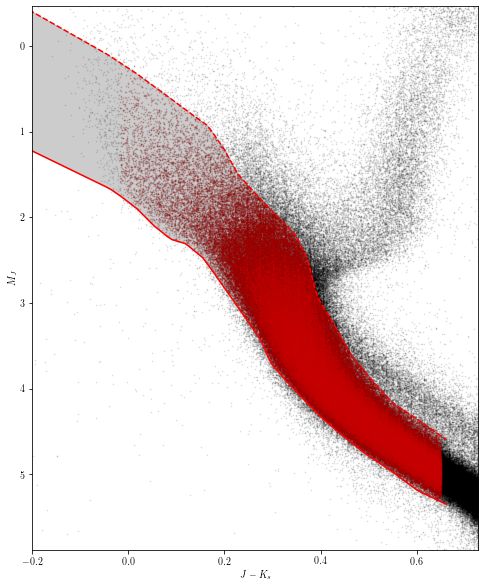

In [11]:
# HR diagram
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.5, length_check=False)
df_mask_65.viz.scatter("JK", "M_J", c='r', alpha=0.1, s=0.5, length_check=False)
plt.plot(jks, j_upper, 'r')
plt.plot(jks, j_lower, 'r--')
plt.fill_between(jks, j_upper, j_lower, alpha=0.2, color="k")
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(-0.2, jks[-1]*1.1)
plt.ylim(j_lower.min()*0.9, j_upper.max()*1.1)
plt.gca().invert_yaxis()
plt.show()

# metal cut

In [12]:
mask = (df_mask_65["mh"].isnan()) & (df_mask_65["feh"].isnan())
df_filtered = df_mask_65[~mask]
df_filtered

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.007952173857691683,-1.4305097809391984,10.581000328063965,10.03499984741211,AAA,4630919191216607488,23.898677825927734,-11.432337330045844,0.012411404401063919,-20.986865106700424,0.013343622907996178,5.7989536702346465,0.010386944748461246,11.89019775390625,12.349108695983887,11.273787498474121,1339.88916015625,1773.7681884765625,0.9732462167739868,1.2178672552108765,2.1822248974591814,-0.610213381765023,172.20570373535156,171.8430938720703,172.71620178222656,0.02449999935925007,0.016599999740719795,0.03139999881386757,nan,nan,nan,K,00014935-8157438,1,222,--,52.90816879272461,gaia,0.8756001591682434,0.8756001591682434,1.0,5061.03515625,gspphot,11.00146484375,9.6337890625,0.0,4.543600082397461,gspphot,0.004600048065185547,0.0034999847412109375,0.0,nan,--,nan,nan,nan,0.3846000134944916,gspphot,0.010100007057189941,0.009999990463256836,0.0,-0.07000000029802322,gspspec,0.03999999910593033,0.05000000074505806,0.0,nan,--,nan,nan,nan,0.5460004806518555,4.397748523260623,172.44490245419334,-98.81823128531313,141.32303969303314,6.221341729418895,23.07469936793523,0.012463924771994607,0.013294578248128389,0.8756001591682434,18.86100169508465,5.085255284726619,0.03548808423919451,0.013665982834339866,-14.861544371355317,0.5025981456637494,54.167759865437134,0.717864992065905,-26.93038823503761,0.4122335468333415,-47.27325057218564,0.5878608753657736,4.139207429566532,4.956685393986543
1,0.009443330810718078,-1.4068876919912512,10.062000274658203,9.657999992370605,AAA,4634292531547062400,80.03723907470703,79.93722242614324,0.013343079015612602,-3.9999700401274243,0.014623326249420643,5.629817906899334,0.012178930453956127,11.110095024108887,11.456314086914062,10.599123001098633,1518.1749267578125,2843.079345703125,0.7739794254302979,1.2011168003082275,2.1887579247061915,-0.633232475275951,176.5635986328125,175.789794921875,180.02969360351562,0.05849999934434891,0.042899999767541885,0.0820000022649765,-0.07999999821186066,-0.23999999463558197,0.07999999821186066,G,00020985-8036314,1,222,--,-47.79001235961914,gaia,0.26287636160850525,0.26287636160850525,1.0,5679.02001953125,gspphot,29.478515625,43.2470703125,0.0,4.461900234222412,gspphot,0.013100147247314453,0.008299827575683594,0.0,nan,--,nan,nan,nan,0.2199999988079071,gspspec,0.03999999165534973,0.01000000536441803,0.0,0.029999999329447746,gspspec,0.03999999910593033,0.029999999329447746,0.0,nan,--,nan,nan,nan,0.40400028228759766,3.8144720150714813,177.62563843752412,-105.11061177622882,143.18738325133592,-78.6303006427475,-14.941054526363132,0.013417307513630478,0.014555249475654867,0.26287636160850525,-12.579554015090025,-66.2024298494398,-0.0298452352969122,-0.1436599164229874,18.13929589425119,0.15740752313701145,-45.96842835046593,0.21264428330506527,-27.326072934701195,0.16996727994296695,75.82310901664022,0.19226774705543745,3.0340236167686374,4.345114318156106
2,0.001975416007284742,-1.3798921433985867,7.301000118255615,6.857999801635742,AAA,4635422588982399616,173.8883514404297,162.425270464122,0.016481924802064896,-62.09016992304387,0.016419915482401848,24.939420796749136,0.013019759207963943,8.467083930969238,8.855419158935547,7.910074234008789,829.9010620117188,1157.595458984375,0.8579095005989075,1.2102466821670532,2.19

In [13]:
gaia_filtered = df_filtered.extract()
mask_feh_mh = ~gaia_filtered["mh"].isnan() & ~gaia_filtered["feh"].isnan()
mask_feh = gaia_filtered["mh"].isnan() & ~gaia_filtered["feh"].isnan()
mask_mh =  ~gaia_filtered["mh"].isnan() & gaia_filtered["feh"].isnan()

feh_mh = gaia_filtered[mask_feh_mh]
feh_mh = feh_mh.extract()
feh_mh['metal'] = feh_mh['mh']

feh = gaia_filtered[mask_feh]
feh = feh.extract()
feh['metal'] = feh['feh']

mh = gaia_filtered[mask_mh]
mh = mh.extract()
mh['metal'] = mh['mh']

df_mask_65 = feh_mh.concat(feh)
df_mask_65 = df_mask_65.concat(mh)
df_mask_65

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal
0,0.012009296423707622,-1.3233286054287434,10.847000122070312,10.383000373840332,AAA,4685158718290026496,58.83890914916992,57.70997595703545,0.011697079055011272,-11.470660491051158,0.010925390757620335,5.043198736304176,0.009529702365398407,12.126617431640625,12.516983985900879,11.561441421508789,1865.1475830078125,3938.53515625,0.9355318546295166,1.2146072387695312,2.213975391241373,-0.7144399309517726,197.4718017578125,197.131103515625,197.8415985107422,0.007899999618530273,0.0017000000225380063,0.011500000022351742,nan,nan,nan,G,00024513-7549161,1,222,--,57.525001525878906,galah,0.11100000143051147,0.11100000143051147,1.0,5191.79150390625,gspphot,9.806640625,5.287109375,0.0,4.48829984664917,gspphot,0.0019998550415039062,0.0016002655029296875,0.0,-0.6913509368896484,galah,0.06476889952476107,0.06476889952476107,1.0,-0.7957000136375427,gspphot,0.010399997234344482,0.008100032806396484,0.0,0.33805419840752327,galah,0.028402818787183676,0.028402818787183676,1.0,nan,--,nan,nan,nan,0.46399974822998047,4.3605305353224875,198.2868517160268,-129.91643672965955,149.79784721724798,-58.750577555136054,-3.222889076669427,0.011650950495142386,0.010974569430534428,0.11100000143051147,-3.0291279448186508,-55.218473863955374,-0.011796500917420854,-0.10491468369965869,-39.97844535623907,0.07327056343825039,41.47318800811746,0.08421153296852861,-69.05867302872282,0.09797304825917708,-0.06970604659797175,0.09219520028458082,3.6083385028443695,4.628381274414155,-0.7957000136375427
1,0.0032882177640498373,-1.2621910830881986,7.800000190734863,7.5970001220703125,AAA,4701758461948318848,20.87449836730957,-16.354367148195085,0.01471635326743126,12.9722529499503,0.016420288011431694,8.410454649576556,0.012681514024734497,8.464082717895508,8.652515411376953,8.128384590148926,1851.48095703125,3608.023681640625,0.9388912916183472,1.18311607837677,2.238763800213232,-0.7728458234774394,118.52539825439453,117.81610107421875,118.82469940185547,0.002099999925121665,0.0003000000142492354,0.01730000041425228,nan,nan,nan,F,00004521-7219055,1,111,--,-1.0309404134750366,apogee,0.07304781675338745,0.07304781675338745,1.0,6724.49755859375,gspphot,3.4951171875,30.11328125,0.0,4.15500020980835,gspphot,0.0029001235961914062,0.013399600982666016,0.0,-0.10700999945402145,apogee,0.005179196130484343,0.005179196130484343,1.0,-0.09715799987316132,apogee,0.0066741290502250195,0.0066741290502250195,1.0,0.699999988079071,gspspec,0.039999961853027344,0.030000030994415283,0.0,-0.036324698477983475,apogee,0.01035263016819954,0.01035263016819954,1.0,0.20300006866455078,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,0.07304781675338745,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.240385966479094,2.847701908629568,-0.09715799987316132
2,0.008375451107885349,-1.110494639233805,11.307999610900879,10.822999954223633,AAA,4901397990793945088,65.65482330322266,63.52297663872962,0.00967240147292614,16.59479370263046,0.010771632194

In [14]:
df_mask_65 = df_mask_65.filter("metal > -0.2").filter("metal < 0.2")
df_mask_65 = df_mask_65.extract()
df_mask_65

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal
0,0.0032882177640498373,-1.2621910830881986,7.800000190734863,7.5970001220703125,AAA,4701758461948318848,20.87449836730957,-16.354367148195085,0.01471635326743126,12.9722529499503,0.016420288011431694,8.410454649576556,0.012681514024734497,8.464082717895508,8.652515411376953,8.128384590148926,1851.48095703125,3608.023681640625,0.9388912916183472,1.18311607837677,2.238763800213232,-0.7728458234774394,118.52539825439453,117.81610107421875,118.82469940185547,0.002099999925121665,0.0003000000142492354,0.01730000041425228,nan,nan,nan,F,00004521-7219055,1,111,--,-1.0309404134750366,apogee,0.07304781675338745,0.07304781675338745,1.0,6724.49755859375,gspphot,3.4951171875,30.11328125,0.0,4.15500020980835,gspphot,0.0029001235961914062,0.013399600982666016,0.0,-0.10700999945402145,apogee,0.005179196130484343,0.005179196130484343,1.0,-0.09715799987316132,apogee,0.0066741290502250195,0.0066741290502250195,1.0,0.699999988079071,gspspec,0.039999961853027344,0.030000030994415283,0.0,-0.036324698477983475,apogee,0.01035263016819954,0.01035263016819954,1.0,0.20300006866455078,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,0.07304781675338745,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.240385966479094,2.847701908629568,-0.09715799987316132
1,0.008375451107885349,-1.110494639233805,11.307999610900879,10.822999954223633,AAA,4901397990793945088,65.65482330322266,63.52297663872962,0.00967240147292614,16.59479370263046,0.010771632194519043,4.289093721606674,0.009547930210828781,12.661384582519531,13.111614227294922,12.052156448364258,1485.888427734375,2564.50146484375,0.9687706232070923,1.2167861461639404,2.3030982026951126,-0.9184847221161382,229.6428985595703,227.56419372558594,230.61509704589844,0.0917000025510788,0.08560000360012054,0.09719999879598618,nan,nan,nan,K,00015517-6337359,1,222,--,-9.140999794006348,galah,0.07999999821186066,0.07999999821186066,1.0,5149.5029296875,gspphot,8.1298828125,7.6328125,0.0,4.597099781036377,gspphot,0.003699779510498047,0.010800361633300781,0.0,0.10993194580078125,galah,0.08151940429155513,0.08151940429155513,1.0,0.1111999973654747,gspphot,0.008799999952316284,0.008200004696846008,0.0,-0.02462034712426417,galah,0.04257457801800691,0.04257457801800691,1.0,nan,--,nan,nan,nan,0.4849996566772461,4.469827291772054,233.14948679307588,-185.27986859374366,141.52757146845892,-55.08727083614404,-35.72041896314721,0.009786502228794394,0.010668073139666098,0.07999999821186066,-39.47565543564137,-60.87851670107848,-0.0886638840877811,-0.1359522400684601,-16.698515869942206,0.08329737665070493,-36.919436846311655,0.08557354204740966,-20.587826593848625,0.11616528055933946,68.15702464833618,0.11095706498795804,3.750683677319332,4.722997496047607,0.1111999973654747
2,0.009009983010740406,-1.0065876141336292,10.904999732971191,10.508999824523926,AAA,4919368958593983488,64.70270538330078,63.22497959539172,0.008725921623408794,13.749250748058596,0.009079704992473125,3.5141

# Classify the stars based on `J-Ks` color

these ranges are non-linear

In [15]:
A0 = spectral_types[spectral_types["SpT"] == "A0V"]
F0 = spectral_types[spectral_types["SpT"] == "F0V"]
G0 = spectral_types[spectral_types["SpT"] == "G0V"]
G3 = spectral_types[spectral_types["SpT"] == "G3V"]
A0 = A0['J-K'].to_numpy()[0]
F0 = F0['J-K'].to_numpy()[0]
G0 = G0['J-K'].to_numpy()[0]
G3 = G3['J-K'].to_numpy()[0]
A0, F0, G0, G3

(-0.004, 0.14100000000000001, 0.329, 0.373)

In [16]:
jk_bound = [[A0, F0], [F0, G0], [G0, G3]]
jk_bound

[[-0.004, 0.14100000000000001], [0.14100000000000001, 0.329], [0.329, 0.373]]

In [17]:
zb = 400
zb

400

In [18]:
data_dir

'/home2/s20321005/Thesis-Project/Data/Color/metal'

gaia_(-0.00)_(0.14).hdf5 571


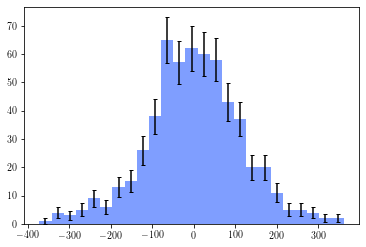

571


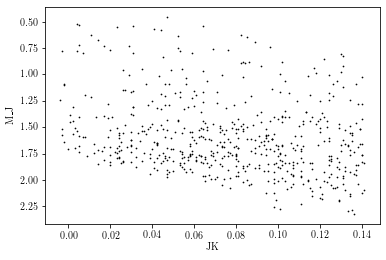

export(hdf5) [----------------------------------------]  0.00% estimated time: unknown                 

export(hdf5) [########################################] 100.00% elapsed time  :    14.52s =  0.2m =  0.0h 
 gaia_(0.14)_(0.33).hdf5 13921


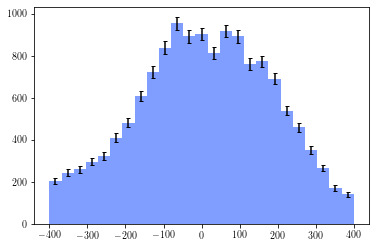

13921


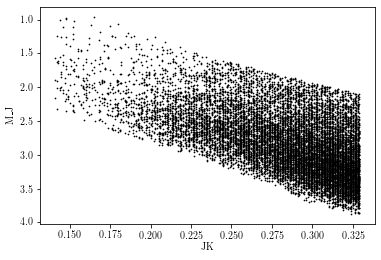

export(hdf5) [########################################] 100.00% elapsed time  :    14.68s =  0.2m =  0.0h  
 gaia_(0.33)_(0.37).hdf5 12940


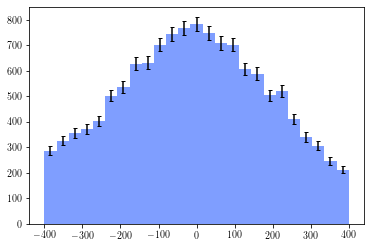

12940


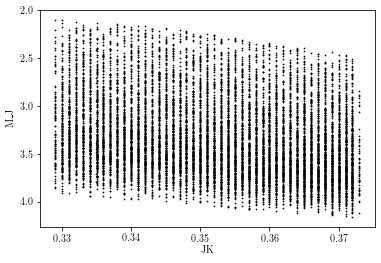

export(hdf5) [########################################] 100.00% elapsed time  :    14.66s =  0.2m =  0.0h  
 

In [21]:
for jk_b in jk_bound:
    jk_low, jk_high = jk_b[0], jk_b[1]
    df_color = df_mask_65.filter(f"JK < {jk_high}").filter(f"JK > {jk_low}").filter(f"abs(z) < {zb}")
    df_color = df_color.extract()
    name = f"gaia_({jk_low:.2f})_({jk_high:.2f}).hdf5"
    print(name, len(df_color))
    zs = df_color["z"].to_numpy()
    znum, zedge = np.histogram(zs, bins=25)
    zmid = (zedge[1:]+zedge[:-1])/2
    zerr = np.sqrt(znum)
    dz = np.diff(zedge)[0]
    plt.bar(zmid, znum, yerr=zerr, width=dz, alpha=0.5, capsize=2)
    # plt.yscale("log")
    plt.show()
    print(len(zs))
    df_color.viz.scatter("JK", "M_J", c='k', alpha=1, s=0.5, length_check=False)
    plt.gca().invert_yaxis()
    plt.show()
    df_color.export(join(data_dir, name), progress=True)
    # break